In [1]:
import pandas as pd
import statsrat as sr
from statsrat.expr.predef.pvl_iti import aba_renewal
from exemplar_models import *
from plotnine import *

In [2]:
save_plots = True
model = null
print(model.pars)

par_vals = {'null': [2.0, 1.0, 5.0]}

# ITI: don't need attention learning or differential attention to produce renewal
# no ITI: don't need attention learning or differential attention to produce renewal
# In both cases, the gradient_ngsec attention learning rule makes the conditioning exemplar more
# sensitive to context during extinction, and makes the extinction exemplar less sensitive to context
# during the test.

            min   max  default
decay_rate  0.0  10.0      0.5
nu          0.0  10.0      0.0
resp_scale  0.0  10.0      1.0


ABA renewal (equal attention weights) 



/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_equal_atn_aba_b_null.jpeg
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_equal_atn_aba_r_null.jpeg


0.1227079406930417
       schedule     trial_name u_name  mean_resp
0  experimental  cs -> nothing     us   0.913970
0       control  cs -> nothing     us   0.791262


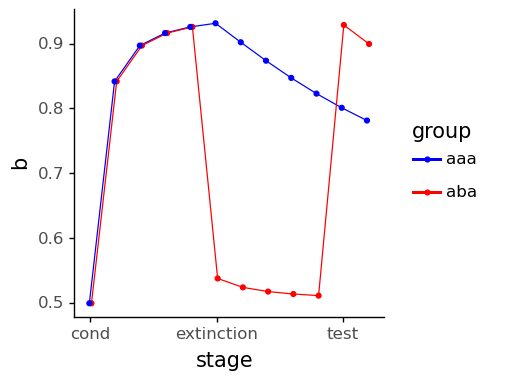

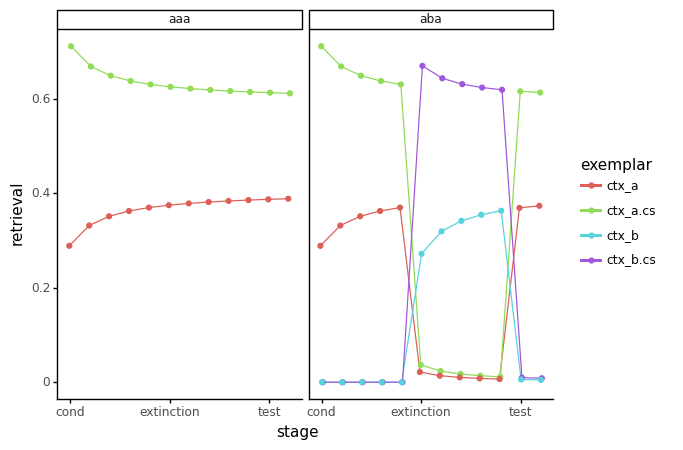

In [3]:
print('ABA renewal (equal attention weights) \n')

trials = aba_renewal.make_trials('experimental')
ds_exp = model.simulate(trials, par_val = par_vals[model.name])

trials = aba_renewal.make_trials('control')
ds_ctl = model.simulate(trials, par_val = par_vals[model.name])

plot_b = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       rename_schedules = {'control': 'aaa', 'experimental': 'aba'},
                       only_main = True,
                       draw_points = True)
plot_b += scale_color_manual(values = {'aba': 'red', 'aaa': 'blue'})
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/exemplar_equal_atn_aba_b_' + model.name + '.jpeg', dpi = 500)
    
plot_r = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'rtrv',
                       schedule_facet = True,
                       rename_coords = {'schedule': 'group', 'ex_name': 'exemplar'},
                       rename_schedules = {'control': 'aaa', 'experimental': 'aba'},
                       only_main = True,
                       draw_points = True)
plot_r += ylab('retrieval')
plot_r += theme_classic()
plot_r.draw()
if save_plots:
    plot_r.save(filename = 'plots/exemplar_equal_atn_aba_r_' + model.name + '.jpeg', dpi = 500)

print(aba_renewal.oats['renewal'].compute_total({'experimental': ds_exp, 'control': ds_ctl}))
print(aba_renewal.oats['renewal'].mean_resp({'experimental': ds_exp, 'control': ds_ctl}))

ABA renewal (selective attention) 



/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_sel_atn_aba_b_null.jpeg
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_sel_atn_aba_r_null.jpeg


0.10602177382651479
       schedule     trial_name u_name  mean_resp
0  experimental  cs -> nothing     us   0.897284
0       control  cs -> nothing     us   0.791262


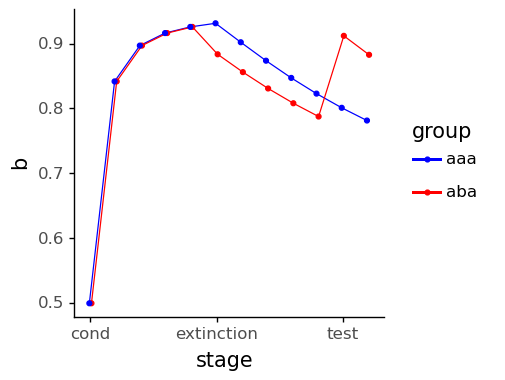

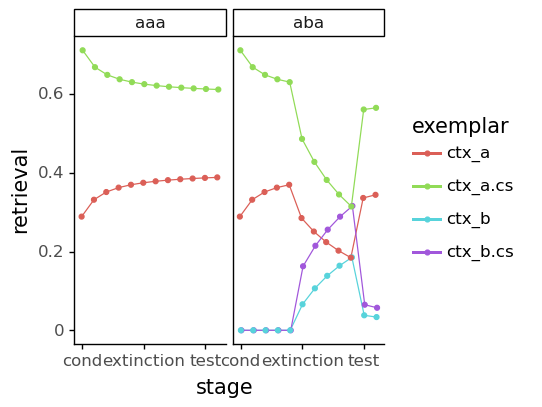

In [4]:
print('ABA renewal (selective attention) \n')

atn_hi = 1.0

trials = aba_renewal.make_trials('experimental')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = atn_hi
init_atn.loc[['ctx_b', 'ctx_b.cs'], 'ctx_b'] = atn_hi
#init_atn.loc[['ctx_b.time1.0', 'ctx_b.time1.0.cs'], ['ctx_b', 'time']] = atn_hi
ds_exp = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = aba_renewal.make_trials('control')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = atn_hi
init_atn.loc[['ctx_a', 'ctx_a.cs'], 'ctx_a'] = atn_hi
#init_atn.loc[['ctx_a.time1.0', 'ctx_a.time1.0.cs'], ['ctx_a', 'time']] = atn_hi
ds_ctl = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

plot_b = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       rename_schedules = {'control': 'aaa', 'experimental': 'aba'},
                       only_main = True,
                       draw_points = True)
plot_b += scale_color_manual(values = {'aba': 'red', 'aaa': 'blue'})
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/exemplar_sel_atn_aba_b_' + model.name + '.jpeg', dpi = 500)
    
plot_r = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'rtrv',
                       schedule_facet = True,
                       rename_coords = {'schedule': 'group', 'ex_name': 'exemplar'},
                       rename_schedules = {'control': 'aaa', 'experimental': 'aba'},
                       only_main = True,
                       draw_points = True)
plot_r += ylab('retrieval')
plot_r.draw()
if save_plots:
    plot_r.save(filename = 'plots/exemplar_sel_atn_aba_r_' + model.name + '.jpeg', dpi = 500)

print(aba_renewal.oats['renewal'].compute_total({'experimental': ds_exp, 'control': ds_ctl}))
print(aba_renewal.oats['renewal'].mean_resp({'experimental': ds_exp, 'control': ds_ctl}))